MODEL TRAINING 

In [20]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')



In [21]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor



In [22]:
df=pd.read_csv(r'D:\mlproject\notebook\data\stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


assigning the varibales its values

In [23]:
X=df.drop('math_score',axis=1)

In [24]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [25]:
y=df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

Printing Categories in of each lable

In [26]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [27]:
print("Total Categories in gender are ",end=" ")
print(df['gender'].unique())

print("Total Categories in race_ethnicity are ",end=" ")
print(df['race_ethnicity'].unique())

print("Total Categories in parental_level_of_education are ",end=" ")
print(df['parental_level_of_education'].unique())

print("Total Categories in lunch are ",end=" ")
print(df['lunch'].unique())

print("Total Categories in test_preparation_course are ",end=" ")
print(df['test_preparation_course'].unique())


Total Categories in gender are  ['female' 'male']
Total Categories in race_ethnicity are  ['group B' 'group C' 'group A' 'group D' 'group E']
Total Categories in parental_level_of_education are  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Total Categories in lunch are  ['standard' 'free/reduced']
Total Categories in test_preparation_course are  ['none' 'completed']


In [28]:
cat_features=X.select_dtypes(include='object').columns
num_features=X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("StandardScaler",numeric_transformer,num_features),
        ("ColumnTransformer",oh_transformer,cat_features),
    ]

)

In [29]:
X=preprocessor.fit_transform(X)

Splitting of DataSet

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
X_train.shape,X_test.shape


((800, 19), (200, 19))

In [31]:
def evalution_metrices(true,pred):
  mae=mean_absolute_error(true,pred)
  mse=mean_squared_error(true,pred)
  rmse=np.sqrt(mean_squared_error(true,pred))
  score=r2_score(true,pred)
  return mae,mse,rmse,score

In [32]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNearest Neighbour":KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Decison tree":DecisionTreeRegressor(),
    "XGBoost":XGBRegressor(),
    "CatBoost":CatBoostRegressor(verbose=False),
    "AdaBoost":AdaBoostRegressor()
}

model_list=[]
r2_list=[]
n=len(list(models))
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    train_mae,train_mse,train_rmse,train_r2score=evalution_metrices(y_train,y_train_pred)
    test_mae,test_mse,test_rmse,test_r2score=evalution_metrices(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2score))
    r2_list.append(test_r2score)
    
    print('='*35)
    print('\n')


LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.3249
- Mean Absolute Error: 4.2696
- R2 Score: 0.8742
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3987
- Mean Absolute Error: 4.2186
- R2 Score: 0.8802


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


KNearest Neighbour
Model performance for Training set
- Root Mean Squared Error: 5.7165
- Mean Absolute Error: 4.5215
- R2 Score: 0.8550
---------------------------

Result

In [33]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Ridge,0.880593
0,LinearRegression,0.880223
4,Random Forest,0.853521
7,CatBoost,0.851632
8,AdaBoost,0.848774
2,Lasso,0.825320
6,XGBoost,0.821220
3,KNearest Neighbour,0.783770
5,Decison tree,0.727006


Linear Regression

In [34]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
prediction=lin_reg.predict(X_test)
score=r2_score(y_test,y_test_pred)
print("The r2_score or accuaracy of the model is %.2f" %score)

The r2_score or accuaracy of the model is 0.85


Text(0, 0.5, 'Predicted')

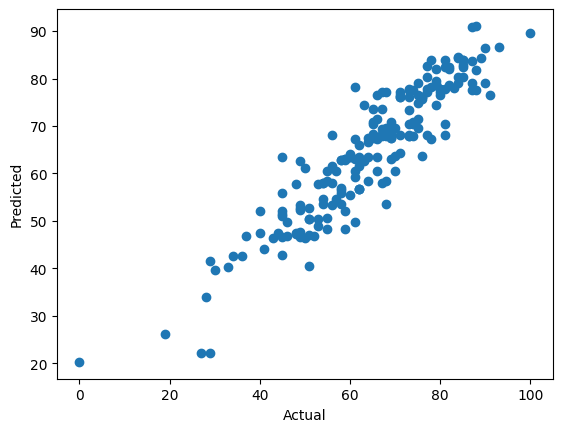

In [35]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

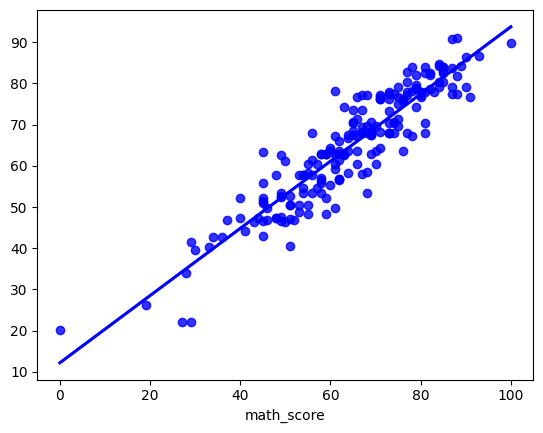

In [36]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='blue')

In [37]:
pred_df=pd.DataFrame({"Actual Value":y_test,"Predicted_value":y_test_pred, "Difference":y_test_pred})